In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve, roc_auc_score, f1_score

N_DATA = 200

In [2]:
# helper_funcs 
def calculate_agreement(model_labels, pos_neg=None, maj_vote=None):
    if pos_neg == None:
        agreement = [int(i == j) for i, j in zip(model_labels, maj_vote)]
        return agreement, np.mean(agreement), len(agreement)
    elif pos_neg == 1:
        agreement = [int(i == j) for i, j in zip(model_labels, maj_vote) if j == 1]
        return agreement, np.mean(agreement), len(agreement)
    elif pos_neg == 0:
        agreement = [int(i == j) for i, j in zip(model_labels, maj_vote) if j == 0]
        print(len(agreement))
        return agreement, np.mean(agreement), len(agreement)
    
def bootstrap_se(data, n_bootstrap=1000):
    means = []
    n = len(data)
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    return np.std(means)

def compute_roc_auc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    return fpr, tpr, roc_auc

In [31]:
three_words = json.load(open("data/expected_info_gain/3_words.json", "r"))
three_words = [v["question_performances"][0] for v in three_words.values()]
ten_words = json.load(open("data/expected_info_gain/10_words.json", "r"))
ten_words = [v["question_performances"][0] for v in ten_words.values()]
thirty_words = json.load(open("data/expected_info_gain/30_words.json", "r"))
thirty_words = [v["question_performances"][0] for v in thirty_words.values()]
fifty_words = json.load(open("data/expected_info_gain/50_words.json", "r"))
fifty_words = [v["question_performances"][0] for v in fifty_words.values()]


llama_labels = json.load(open("data/labels/llama_0_200_answer_first.json", "r"))
llama_70_labels = json.load(open("data/labels/llama_70b_0_200_question.json", "r"))
gpt4_labels = json.load(open("data/labels/gpt4_0_200_answer_first.json", "r"))["label"]
maj_vote = json.load(open("data/labels/exp_when_9_pp_maj_votes_0_200.json", "r"))
mean_vote = json.load(open("data/labels/exp_when_9_pp_mean_votes_0_200.json", "r"))

In [64]:
# find best cost param:
cost = 0.02
three_words_median_split = [1 if datum > cost else 0 for datum in thirty_words][:N_DATA]

print("MI", three_words_median_split.count(1))
mi_agreement_combined, mean_mi_agreement_combined, n_mi_combined = calculate_agreement(three_words_median_split, pos_neg=None, maj_vote=maj_vote)
mi_agreement_answer_dir, mean_mi_agreement_answer_dir, n_mi_answer_dir = calculate_agreement(three_words_median_split, pos_neg=0, maj_vote=maj_vote)
mi_agreement_ask_question, mean_mi_agreement_ask_question, n_mi_ask_question = calculate_agreement(three_words_median_split, pos_neg=1, maj_vote=maj_vote)
print(mean_mi_agreement_combined, mean_mi_agreement_answer_dir, mean_mi_agreement_ask_question)
print(llama_labels.count(1))

MI 86
124
0.68 0.7016129032258065 0.6447368421052632
54


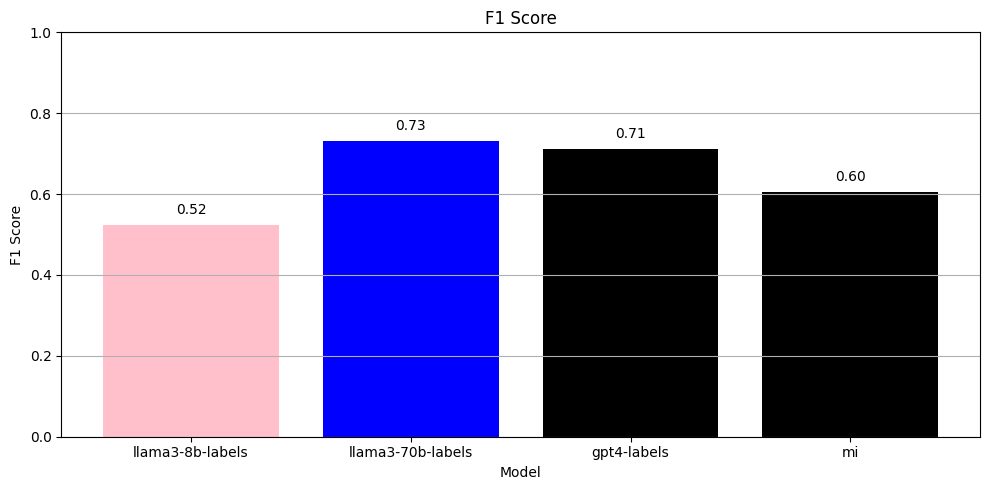

In [65]:
# Compute F1 scores for each model
llama_f1 = f1_score(maj_vote, llama_labels, average='binary')
llama_f1_70 = f1_score(maj_vote, llama_70_labels, average='binary')
gpt4_f1 = f1_score(maj_vote, gpt4_labels, average='binary')

# llama38b_behavior = json.load(open('results/base_questions_user_21_max_words_25_full_sentence.json'))
# llama370b_behavior = json.load(open('results/70b_questions.json'))
# llama_f1b = f1_score(maj_vote, llama38b_behavior, average='binary')
# llama_f1_70b = f1_score(maj_vote, llama370b_behavior, average='binary')
mi_f1 = f1_score(maj_vote, three_words_median_split , average='binary')
# mi_f2 = f1_score(maj_vote, mutual_information_median_split , average='binary')

# Plotting
models = ['llama3-8b-labels', 'llama3-70b-labels', 'gpt4-labels','mi']
f1_scores = [llama_f1, llama_f1_70, gpt4_f1, mi_f1]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(models, f1_scores, color=['pink', 'blue', 'black','black', 'pink', 'blue'])
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score')
ax.set_ylim(0, 1)  # Setting y-axis limit from 0 to 1 for F1 score
ax.grid(axis='y')

# Adding text annotations with the exact F1 scores on top of each bar
for i, score in enumerate(f1_scores):
    ax.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

0.69
124
124
124


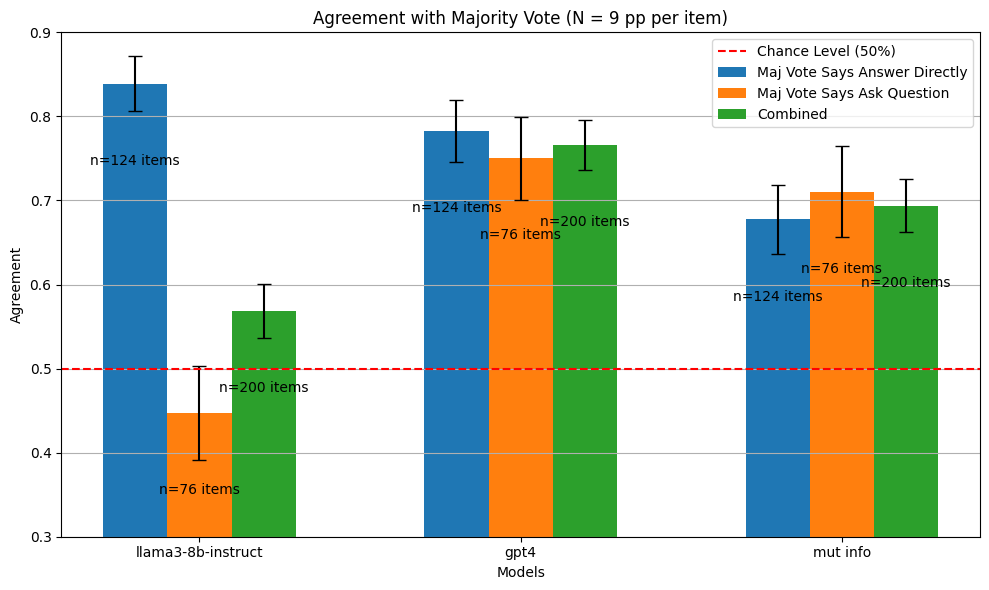

In [66]:
# Compute agreements for pos_neg == None, 0, and 1
llama_agreement_combined, mean_llama_agreement_combined, n_llama_combined = calculate_agreement(llama_labels, pos_neg=None, maj_vote=maj_vote)
gpt4_agreement_combined, mean_gpt4_agreement_combined, n_gpt4_combined = calculate_agreement(gpt4_labels, pos_neg=None, maj_vote=maj_vote)
mi_agreement_combined, mean_mi_agreement_combined, n_mi_combined = calculate_agreement(mutual_information_median_split, pos_neg=None, maj_vote=maj_vote)
print(mean_llama_agreement_combined)
llama_agreement_answer_dir, mean_llama_agreement_answer_dir, n_llama_answer_dir = calculate_agreement(llama_labels, pos_neg=0, maj_vote=maj_vote)
gpt4_agreement_answer_dir, mean_gpt4_agreement_answer_dir, n_gpt4_answer_dir = calculate_agreement(gpt4_labels, pos_neg=0, maj_vote=maj_vote)
mi_agreement_answer_dir, mean_mi_agreement_answer_dir, n_mi_answer_dir = calculate_agreement(mutual_information_median_split, pos_neg=0, maj_vote=maj_vote)

llama_agreement_ask_question, mean_llama_agreement_ask_question, n_llama_ask_question = calculate_agreement(llama_labels, pos_neg=1, maj_vote=maj_vote)
gpt4_agreement_ask_question, mean_gpt4_agreement_ask_question, n_gpt4_ask_question = calculate_agreement(gpt4_labels, pos_neg=1, maj_vote=maj_vote)
mi_agreement_ask_question, mean_mi_agreement_ask_question, n_mi_ask_question = calculate_agreement(mutual_information_median_split, pos_neg=1, maj_vote=maj_vote)

# Bootstrapped standard error calculation
llama_boot_se_combined = bootstrap_se(llama_agreement_combined)
gpt4_boot_se_combined = bootstrap_se(gpt4_agreement_combined)
mi_boot_se_combined = bootstrap_se(mi_agreement_combined)

llama_boot_se_answer_dir = bootstrap_se(llama_agreement_answer_dir)
gpt4_boot_se_answer_dir = bootstrap_se(gpt4_agreement_answer_dir)
mi_boot_se_answer_dir = bootstrap_se(mi_agreement_answer_dir)

llama_boot_se_ask_question = bootstrap_se(llama_agreement_ask_question)
gpt4_boot_se_ask_question = bootstrap_se(gpt4_agreement_ask_question)
mi_boot_se_ask_question = bootstrap_se(mi_agreement_ask_question)

# Plotting
models = ['llama3-8b-instruct', 'gpt4', 'mut info']
labels = ['Maj Vote Says Answer Directly', 'Maj Vote Says Ask Question', 'Combined']
agreements = [
    [mean_llama_agreement_answer_dir, mean_llama_agreement_ask_question, np.mean([mean_llama_agreement_combined,mean_llama_agreement_ask_question])],
    [mean_gpt4_agreement_answer_dir, mean_gpt4_agreement_ask_question, np.mean([mean_gpt4_agreement_answer_dir,mean_gpt4_agreement_ask_question])],
    [mean_mi_agreement_answer_dir, mean_mi_agreement_ask_question, np.mean([mean_mi_agreement_answer_dir,mean_mi_agreement_ask_question])],
]
n_values = [
    [n_llama_answer_dir, n_llama_ask_question, n_llama_combined],
    [n_gpt4_answer_dir, n_gpt4_ask_question, n_gpt4_combined],
    [n_mi_answer_dir, n_mi_ask_question, n_mi_combined]
]
boot_se_values = [
    [llama_boot_se_answer_dir, llama_boot_se_ask_question, llama_boot_se_combined],
    [gpt4_boot_se_answer_dir, gpt4_boot_se_ask_question, gpt4_boot_se_combined],
    [mi_boot_se_answer_dir, mi_boot_se_ask_question, mi_boot_se_combined]
]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(labels)):
    ax.bar(x + i * width - width, [agreements[j][i] for j in range(len(models))], width, label=labels[i], yerr=[boot_se_values[j][i] for j in range(len(models))], capsize=5)
    for j in range(len(models)):
        ax.text(x[j] + i * width - width, agreements[j][i] - 0.1, f'n={n_values[j][i]} items', ha='center', va='bottom')

ax.axhline(y=0.5, color='r', linestyle='--', label='Chance Level (50%)')
ax.set_xlabel('Models')
ax.set_ylabel('Agreement')
ax.set_title('Agreement with Majority Vote (N = 9 pp per item)')
ax.set_xticks(x)
ax.set_ylim(.3, .9)
ax.grid(axis='y')
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


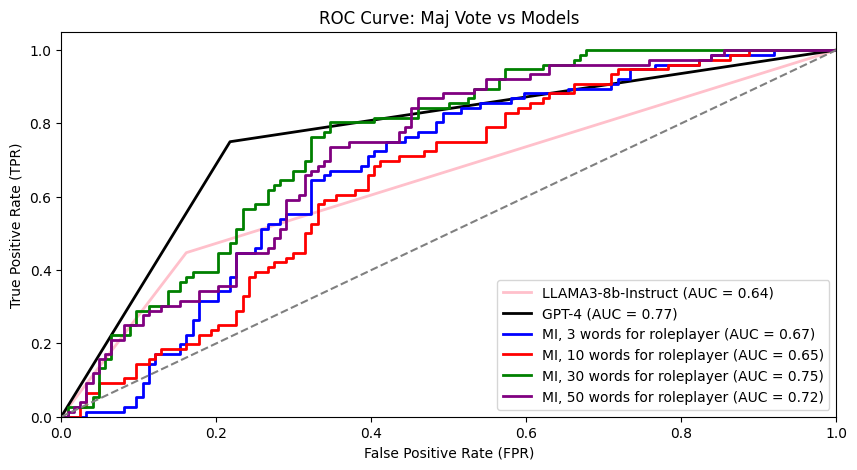

In [35]:
# Compute ROC curves f
fpr_llama, tpr_llama, roc_auc_llama = compute_roc_auc(maj_vote, llama_labels)
fpr_gpt4, tpr_gpt4, roc_auc_gpt4 = compute_roc_auc(maj_vote, gpt4_labels)

fpr_mi_3, tpr_mi_3, roc_auc_mi_3 = compute_roc_auc(maj_vote, three_words)
fpr_mi_10, tpr_mi_10, roc_auc_mi_10 = compute_roc_auc(maj_vote, ten_words)
fpr_mi_30, tpr_mi_30, roc_auc_mi_30 = compute_roc_auc(maj_vote, thirty_words)
fpr_mi_50, tpr_mi_50, roc_auc_mi_50 = compute_roc_auc(maj_vote, fifty_words)

plt.figure(figsize=(10, 5))
plt.plot(fpr_llama, tpr_llama, color='pink', lw=2, label=f'LLAMA3-8b-Instruct (AUC = {roc_auc_llama:.2f})')
plt.plot(fpr_gpt4, tpr_gpt4, color='black', lw=2, label=f'GPT-4 (AUC = {roc_auc_gpt4:.2f})')

plt.plot(fpr_mi_3, tpr_mi_3, color='blue', lw=2, label=f'MI, 3 words for roleplayer (AUC = {roc_auc_mi_3:.2f})')
plt.plot(fpr_mi_10, tpr_mi_10, color='red', lw=2, label=f'MI, 10 words for roleplayer (AUC = {roc_auc_mi_10:.2f})')
plt.plot(fpr_mi_30, tpr_mi_30, color='green', lw=2, label=f'MI, 30 words for roleplayer (AUC = {roc_auc_mi_30:.2f})')
plt.plot(fpr_mi_50, tpr_mi_50, color='purple', lw=2, label=f'MI, 50 words for roleplayer (AUC = {roc_auc_mi_50:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve: Maj Vote vs Models')
plt.legend(loc="lower right")
plt.show()

# 'pink', 'blue', 'black', 'pink', 'blue'

In [8]:
# Load behavior data 

stargate_epoch_1 = json.load(open('results/no_cot_ckpt_1_questions_user_21_max_words_25_full_sentence_lr_1e-5.json'))
stargate_epoch_2 = json.load(open('results/no_cot_ckpt_2_questions_user_21_max_words_25_full_sentence_lr_1e-5.json'))


stargate_epoch_1_cot = json.load(open('results/cot_ckpt_1_questions_user_21_max_words_25_full_sentence_lr_1e-5.json'))
stargate_epoch_2_cot = json.load(open('results/cot_ckpt_2_questions_user_21_max_words_25_full_sentence_lr_1e-5.json'))

stargate_epoch_1_cot_eig = json.load(open('results/cot_ckpt_1_questions_eig.json'))
stargate_epoch_2_cot_eig = json.load(open('results/cot_ckpt_2_questions_eig.json'))
print(stargate_epoch_1_cot_eig)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]


10 10


/tmp/user/22820/ipykernel_3779705/620323907.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)


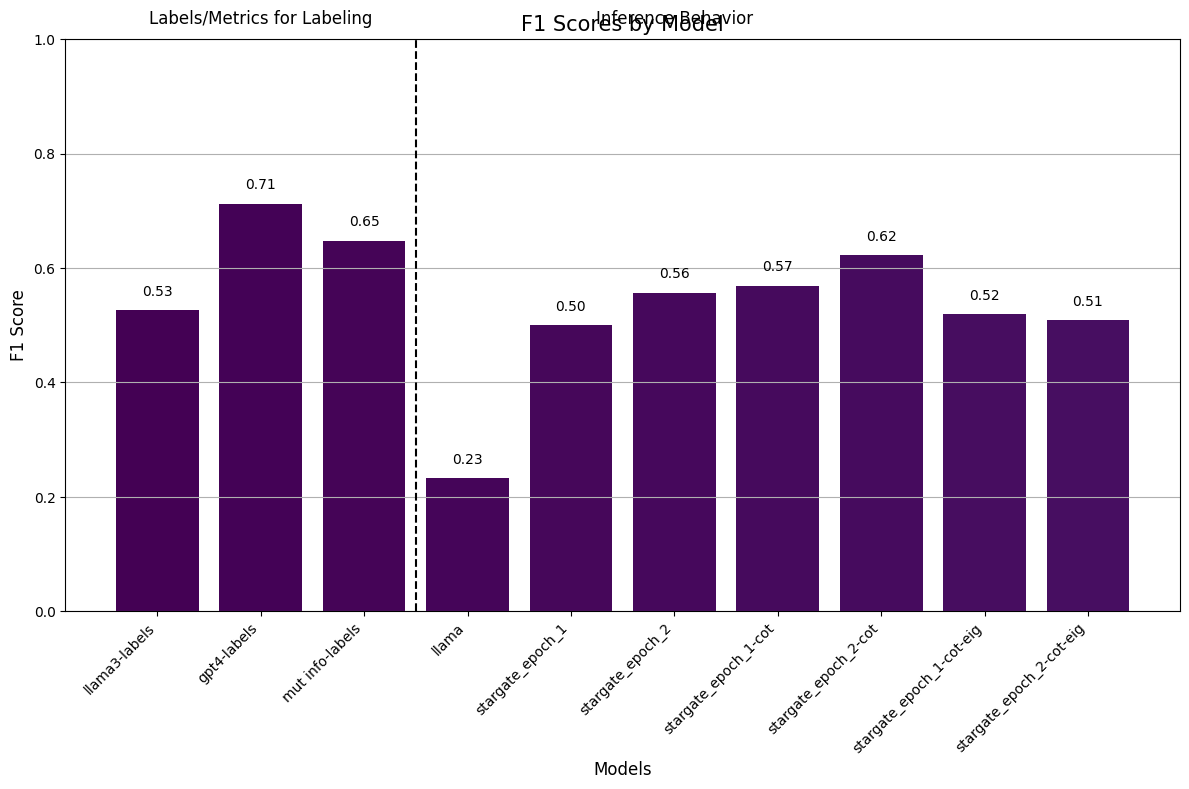

In [9]:
# Compute F1 scores for each model
llama_lf = f1_score(maj_vote, llama_labels, average='binary')
gpt4_f1 = f1_score(maj_vote, gpt4_labels, average='binary')
mi = f1_score(maj_vote, mutual_information_median_split, average='binary')

llama_f1 = f1_score(maj_vote, llama38b_behavior, average='binary')
stargate_f1_epoch_1 = f1_score(maj_vote, stargate_epoch_1, average='binary')
stargate_f1_epoch_2 = f1_score(maj_vote, stargate_epoch_2, average='binary')
stargate_f1_epoch_1_cot = f1_score(maj_vote, stargate_epoch_1_cot , average='binary')
stargate_f1_epoch_2_cot = f1_score(maj_vote, stargate_epoch_2_cot, average='binary')
stargate_f1_epoch_1_cot_eig = f1_score(maj_vote, stargate_epoch_1_cot_eig , average='binary')
stargate_f1_epoch_2_cot_eig = f1_score(maj_vote, stargate_epoch_2_cot_eig, average='binary')

# Plotting
models = ['llama3-labels', 'gpt4-labels', 'mut info-labels', 'llama', 'stargate_epoch_1', 'stargate_epoch_2', 'stargate_epoch_1-cot', 'stargate_epoch_2-cot', 'stargate_epoch_1-cot-eig', 'stargate_epoch_2-cot-eig']
f1_scores = [llama_lf, gpt4_f1, mi, llama_f1, stargate_f1_epoch_1, stargate_f1_epoch_2, stargate_f1_epoch_1_cot, stargate_f1_epoch_2_cot, stargate_f1_epoch_1_cot_eig, stargate_f1_epoch_2_cot_eig]
print(len(models), len(f1_scores))
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, f1_scores, color=plt.cm.viridis(range(len(models))))

# Adding the vertical bar and labels
plt.axvline(x=2.5, color='black', linestyle='--')
ax.text(1, 1.02, 'Labels/Metrics for Labeling', ha='center', va='bottom', fontsize=12)
ax.text(5, 1.02, 'Inference Behavior', ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
ax.set_title('F1 Scores by Model', fontsize=15)
ax.set_ylim(0, 1)  # Setting y-axis limit from 0 to 1 for F1 score
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.grid(axis='y')

# Adding text annotations with the exact F1 scores on top of each bar
for bar, score in zip(bars, f1_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

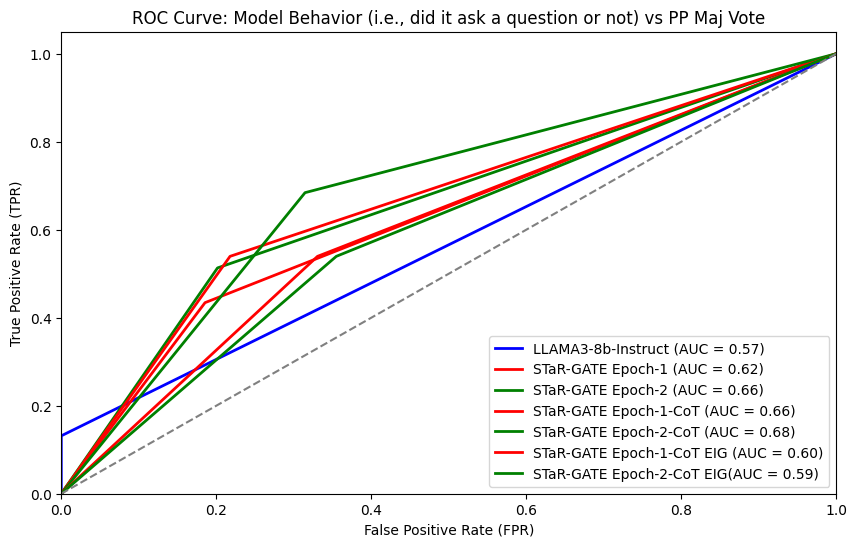

In [10]:


# Compute ROC AUC
fpr_llama, tpr_llama, roc_auc_llama = compute_roc_auc(maj_vote, llama38b_behavior)
fpr_epoch_1_no_cot, tpr_epoch_1_no_cot, roc_auc_epoch_1_no_cot = compute_roc_auc(maj_vote, stargate_epoch_1)
fpr_epoch_2_no_cot, tpr_epoch_2_no_cot, roc_auc_epoch_2_no_cot = compute_roc_auc(maj_vote, stargate_epoch_2)
fpr_epoch_1, tpr_epoch_1, roc_auc_epoch_1 = compute_roc_auc(maj_vote, stargate_epoch_1_cot)
fpr_epoch_2, tpr_epoch_2, roc_auc_epoch_2 = compute_roc_auc(maj_vote, stargate_epoch_2_cot)
fpr_epoch_1_eig, tpr_epoch_1_eig, roc_auc_epoch_1_eig = compute_roc_auc(maj_vote, stargate_epoch_1_cot_eig)
fpr_epoch_2_eig, tpr_epoch_2_eig, roc_auc_epoch_2_eig = compute_roc_auc(maj_vote, stargate_epoch_2_cot_eig)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_llama, tpr_llama, color='blue', lw=2, label=f'LLAMA3-8b-Instruct (AUC = {roc_auc_llama:.2f})')
plt.plot(fpr_epoch_1_no_cot, tpr_epoch_1_no_cot, color='red', lw=2, label=f'STaR-GATE Epoch-1 (AUC = {roc_auc_epoch_1_no_cot:.2f})')
plt.plot(fpr_epoch_2_no_cot, tpr_epoch_2_no_cot, color='green', lw=2, label=f'STaR-GATE Epoch-2 (AUC = {roc_auc_epoch_2_no_cot:.2f})')
plt.plot(fpr_epoch_1, tpr_epoch_1, color='red', lw=2, label=f'STaR-GATE Epoch-1-CoT (AUC = {roc_auc_epoch_1:.2f})')
plt.plot(fpr_epoch_2, tpr_epoch_2, color='green', lw=2, label=f'STaR-GATE Epoch-2-CoT (AUC = {roc_auc_epoch_2:.2f})')
plt.plot(fpr_epoch_1_eig, tpr_epoch_1_eig, color='red', lw=2, label=f'STaR-GATE Epoch-1-CoT EIG (AUC = {roc_auc_epoch_1_eig:.2f})')
plt.plot(fpr_epoch_2_eig, tpr_epoch_2_eig, color='green', lw=2, label=f'STaR-GATE Epoch-2-CoT EIG(AUC = {roc_auc_epoch_2_eig:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve: Model Behavior (i.e., did it ask a question or not) vs PP Maj Vote')
plt.legend(loc="lower right")
plt.show()


[0.4573170731707317, 0.4830508474576271, 0.4725] [0.4573170731707317, 0.4830508474576271, 0.4725]


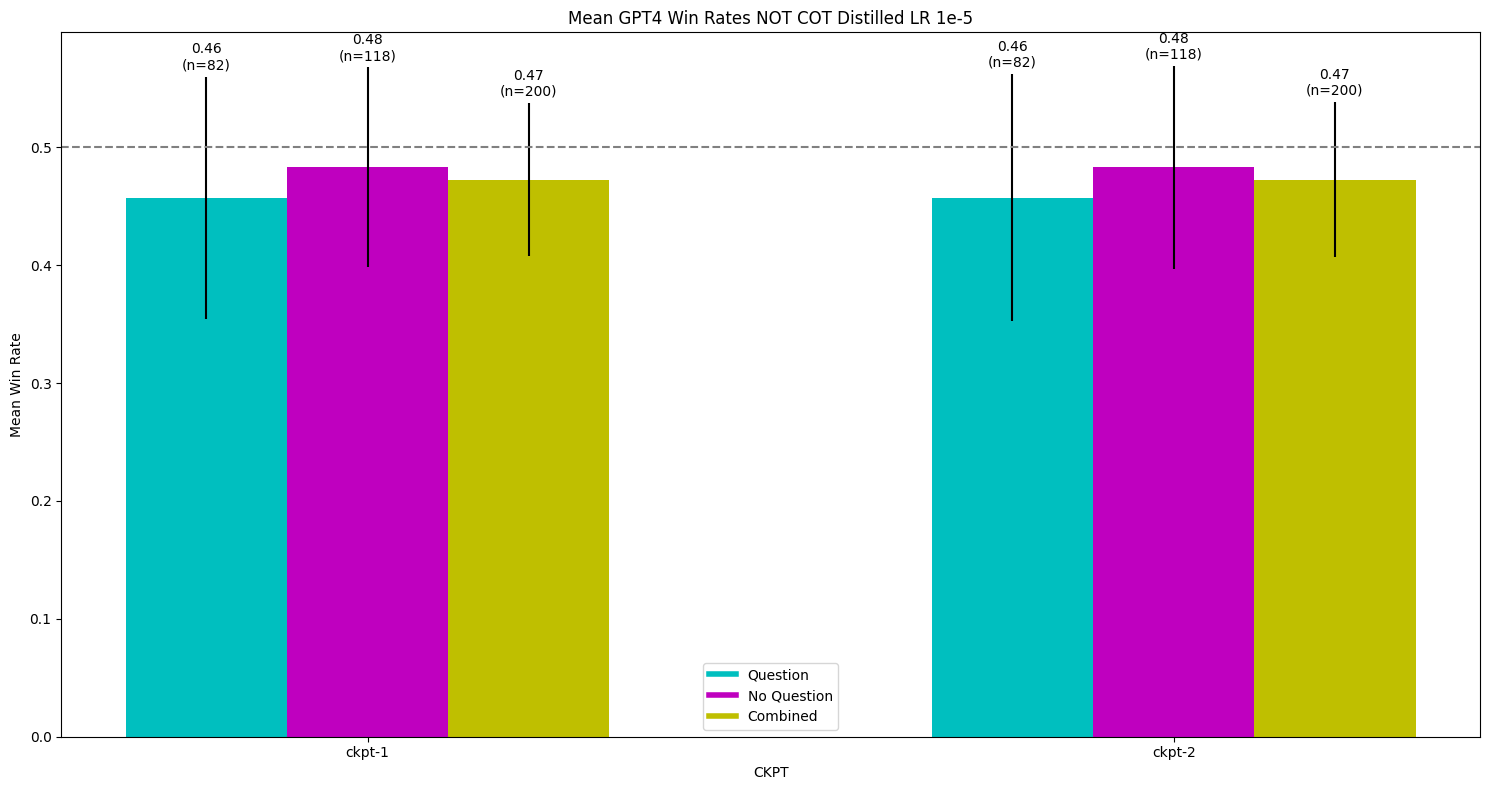

In [12]:
# Load win rates data
stargate_epoch_1_no_cot = json.load(open("results/cot_ckpt_1_questions_eig.json", "r"))
win_rates_no_cot_1 = json.load(open("results/cot_ckpt_1_win_rates_eig.json", "r"))
win_rates_no_cot_1_q = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 1]
win_rates_no_cot_1_nq = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 0]


stargate_epoch_1_cot = json.load(open("results/cot_ckpt_1_questions_eig.json", "r"))
win_rates_cot_1 = json.load(open("results/cot_ckpt_1_win_rates_eig.json", "r"))
win_rates_cot_1_q = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 1]
win_rates_cot_1_nq = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 0]

# Calculate means and CIs
epochs = ['ckpt-1', 'ckpt-2']
win_rates_no_cot_q = [win_rates_no_cot_1_q, win_rates_no_cot_1_nq, win_rates_no_cot_1]
win_rates_cot_q = [win_rates_cot_1_q, win_rates_cot_1_nq, win_rates_cot_1]

mean_no_cot = [np.mean(win_rate) for win_rate in win_rates_no_cot_q]
mean_cot = [np.mean(win_rate) for win_rate in win_rates_cot_q]
print(mean_no_cot, mean_cot)

ci_no_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_no_cot_q]
ci_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_cot_q]

lens_no_cot = [len(win_rates_no_cot_1_q), len(win_rates_no_cot_1_nq), len(win_rates_no_cot_1)]
lens_cot = [len(win_rates_cot_1_q), len(win_rates_cot_1_nq), len(win_rates_cot_1)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(epochs))

# Define colors for the bars
colors = ['c', 'm', 'y']
labels = ['Question', 'No Question', 'Combined']

# Plot bars for mean_no_cot
for i, (mean, ci, length) in enumerate(zip(mean_no_cot, ci_no_cot, lens_no_cot)):
    bar = ax.bar(index[0] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Plot bars for mean_cot
for i, (mean, ci, length) in enumerate(zip(mean_cot, ci_cot, lens_cot)):
    bar = ax.bar(index[1] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Add labels and title
ax.set_xlabel('CKPT')
ax.set_ylabel('Mean Win Rate')
ax.set_title('Mean GPT4 Win Rates NOT COT Distilled LR 1e-5')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(epochs)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(custom_legend, labels)

# Add vertical line at 0.5 to represent chance
ax.axhline(y=0.5, color='grey', linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

[0.7358490566037735, 0.48639455782312924, 0.5525] [0.7272727272727273, 0.5448275862068965, 0.595]


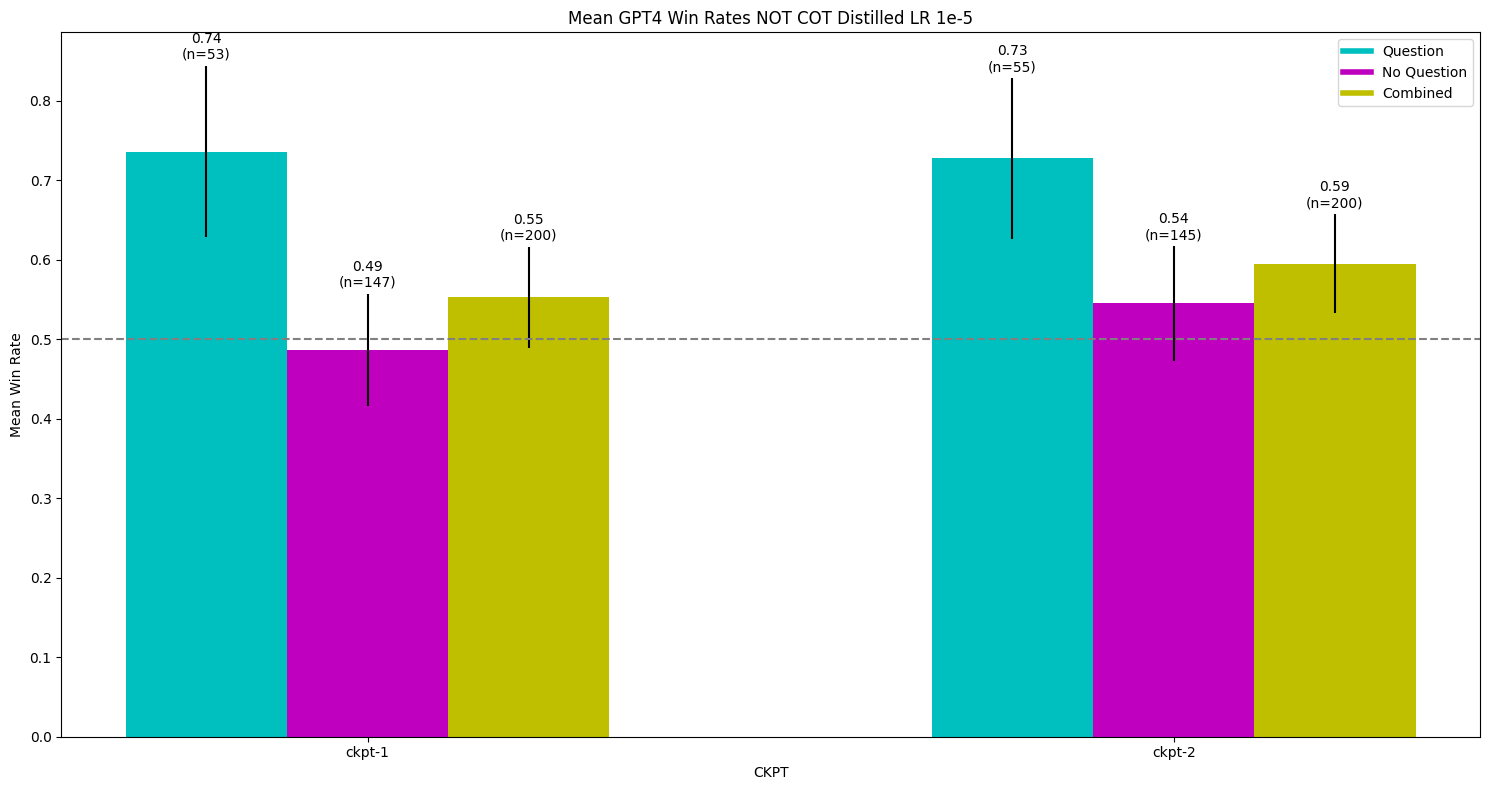

In [56]:
# Load win rates data
stargate_epoch_1_no_cot = json.load(open("results/no_cot_ckpt_1_questions_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_no_cot_1 = json.load(open("results/no_cot_ckpt_1_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_no_cot_1_q = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 1]
win_rates_no_cot_1_nq = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 0]


stargate_epoch_1_cot = json.load(open("results/no_cot_ckpt_2_questions_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_cot_1 = json.load(open("results/no_cot_ckpt_2_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_cot_1_q = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 1]
win_rates_cot_1_nq = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 0]

# Calculate means and CIs
epochs = ['ckpt-1', 'ckpt-2']
win_rates_no_cot_q = [win_rates_no_cot_1_q, win_rates_no_cot_1_nq, win_rates_no_cot_1]
win_rates_cot_q = [win_rates_cot_1_q, win_rates_cot_1_nq, win_rates_cot_1]

mean_no_cot = [np.mean(win_rate) for win_rate in win_rates_no_cot_q]
mean_cot = [np.mean(win_rate) for win_rate in win_rates_cot_q]
print(mean_no_cot, mean_cot)

ci_no_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_no_cot_q]
ci_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_cot_q]

lens_no_cot = [len(win_rates_no_cot_1_q), len(win_rates_no_cot_1_nq), len(win_rates_no_cot_1)]
lens_cot = [len(win_rates_cot_1_q), len(win_rates_cot_1_nq), len(win_rates_cot_1)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(epochs))

# Define colors for the bars
colors = ['c', 'm', 'y']
labels = ['Question', 'No Question', 'Combined']

# Plot bars for mean_no_cot
for i, (mean, ci, length) in enumerate(zip(mean_no_cot, ci_no_cot, lens_no_cot)):
    bar = ax.bar(index[0] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Plot bars for mean_cot
for i, (mean, ci, length) in enumerate(zip(mean_cot, ci_cot, lens_cot)):
    bar = ax.bar(index[1] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Add labels and title
ax.set_xlabel('CKPT')
ax.set_ylabel('Mean Win Rate')
ax.set_title('Mean GPT4 Win Rates NOT COT Distilled LR 1e-5')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(epochs)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(custom_legend, labels)

# Add vertical line at 0.5 to represent chance
ax.axhline(y=0.5, color='grey', linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

[0.47058823529411764, 0.5227272727272727, 0.505] [0.6263736263736264, 0.4541284403669725, 0.5325]


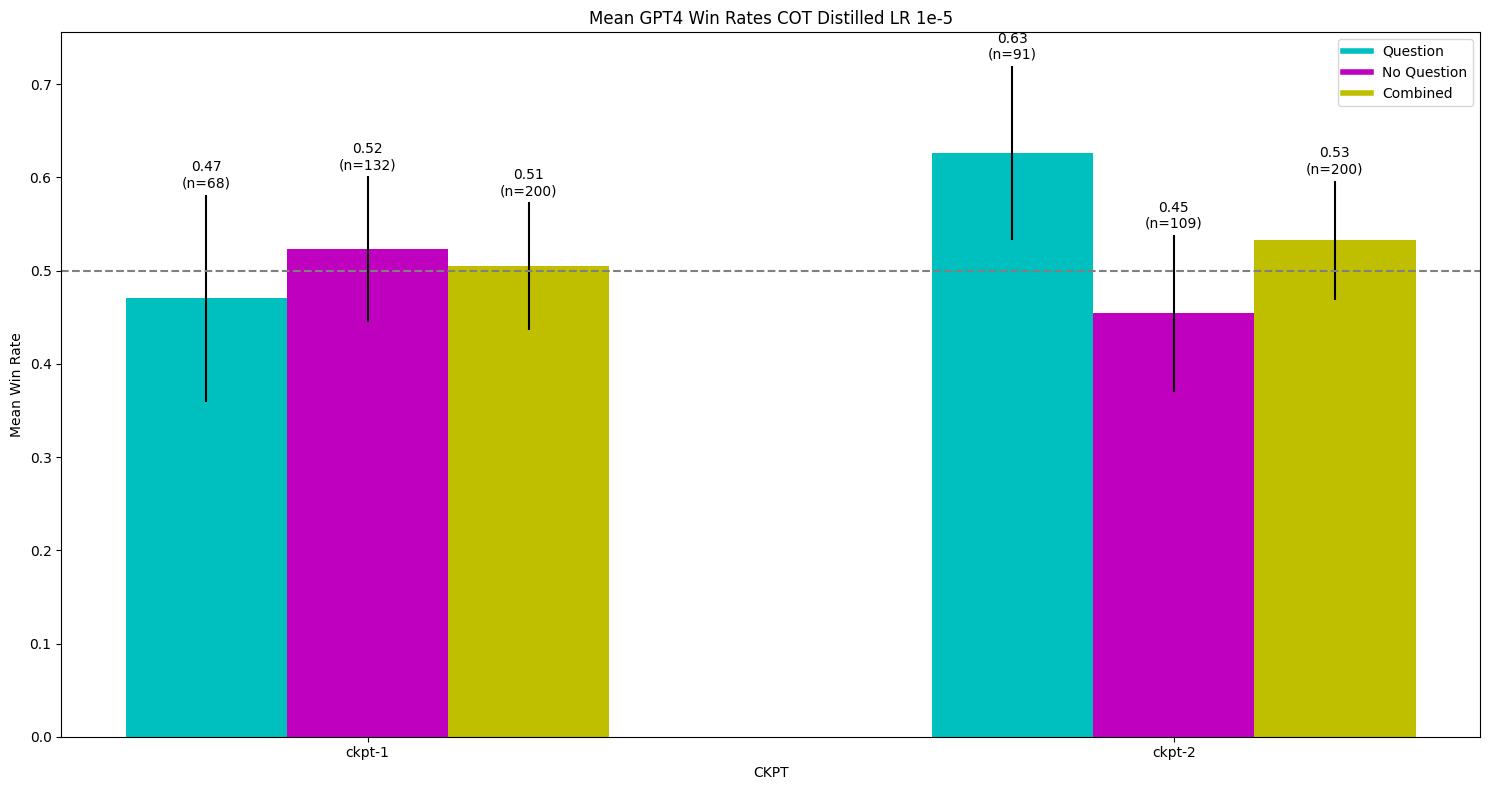

In [57]:
# Load win rates data
stargate_epoch_1_no_cot = json.load(open("results/cot_ckpt_1_questions_user_21_max_words_25_full_sentence_lr_1e-5.json", "r"))
win_rates_no_cot_1 = json.load(open("results/cot_ckpt_1_win_rates_user_21_max_words_25_full_sentence_lr_1e-5.json", "r"))
win_rates_no_cot_1_q = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 1]
win_rates_no_cot_1_nq = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 0]


stargate_epoch_1_cot = json.load(open("results/cot_ckpt_2_questions_user_21_max_words_25_full_sentence_lr_1e-5.json", "r"))
win_rates_cot_1 = json.load(open("results/cot_ckpt_2_win_rates_user_21_max_words_25_full_sentence_lr_1e-5.json", "r"))
win_rates_cot_1_q = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 1]
win_rates_cot_1_nq = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 0]

# Calculate means and CIs
epochs = ['ckpt-1', 'ckpt-2']
win_rates_no_cot_q = [win_rates_no_cot_1_q, win_rates_no_cot_1_nq, win_rates_no_cot_1]
win_rates_cot_q = [win_rates_cot_1_q, win_rates_cot_1_nq, win_rates_cot_1]

mean_no_cot = [np.mean(win_rate) for win_rate in win_rates_no_cot_q]
mean_cot = [np.mean(win_rate) for win_rate in win_rates_cot_q]
print(mean_no_cot, mean_cot)

ci_no_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_no_cot_q]
ci_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_cot_q]

lens_no_cot = [len(win_rates_no_cot_1_q), len(win_rates_no_cot_1_nq), len(win_rates_no_cot_1)]
lens_cot = [len(win_rates_cot_1_q), len(win_rates_cot_1_nq), len(win_rates_cot_1)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(epochs))

# Define colors for the bars
colors = ['c', 'm', 'y']
labels = ['Question', 'No Question', 'Combined']

# Plot bars for mean_no_cot
for i, (mean, ci, length) in enumerate(zip(mean_no_cot, ci_no_cot, lens_no_cot)):
    bar = ax.bar(index[0] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Plot bars for mean_cot
for i, (mean, ci, length) in enumerate(zip(mean_cot, ci_cot, lens_cot)):
    bar = ax.bar(index[1] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Add labels and title
ax.set_xlabel('CKPT')
ax.set_ylabel('Mean Win Rate')
ax.set_title('Mean GPT4 Win Rates COT Distilled LR 1e-5')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(epochs)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(custom_legend, labels)

# Add vertical line at 0.5 to represent chance
ax.axhline(y=0.5, color='grey', linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

[0.9264705882352942, 0.4583333333333333, 0.6175] [0.8681318681318682, 0.536697247706422, 0.6875]


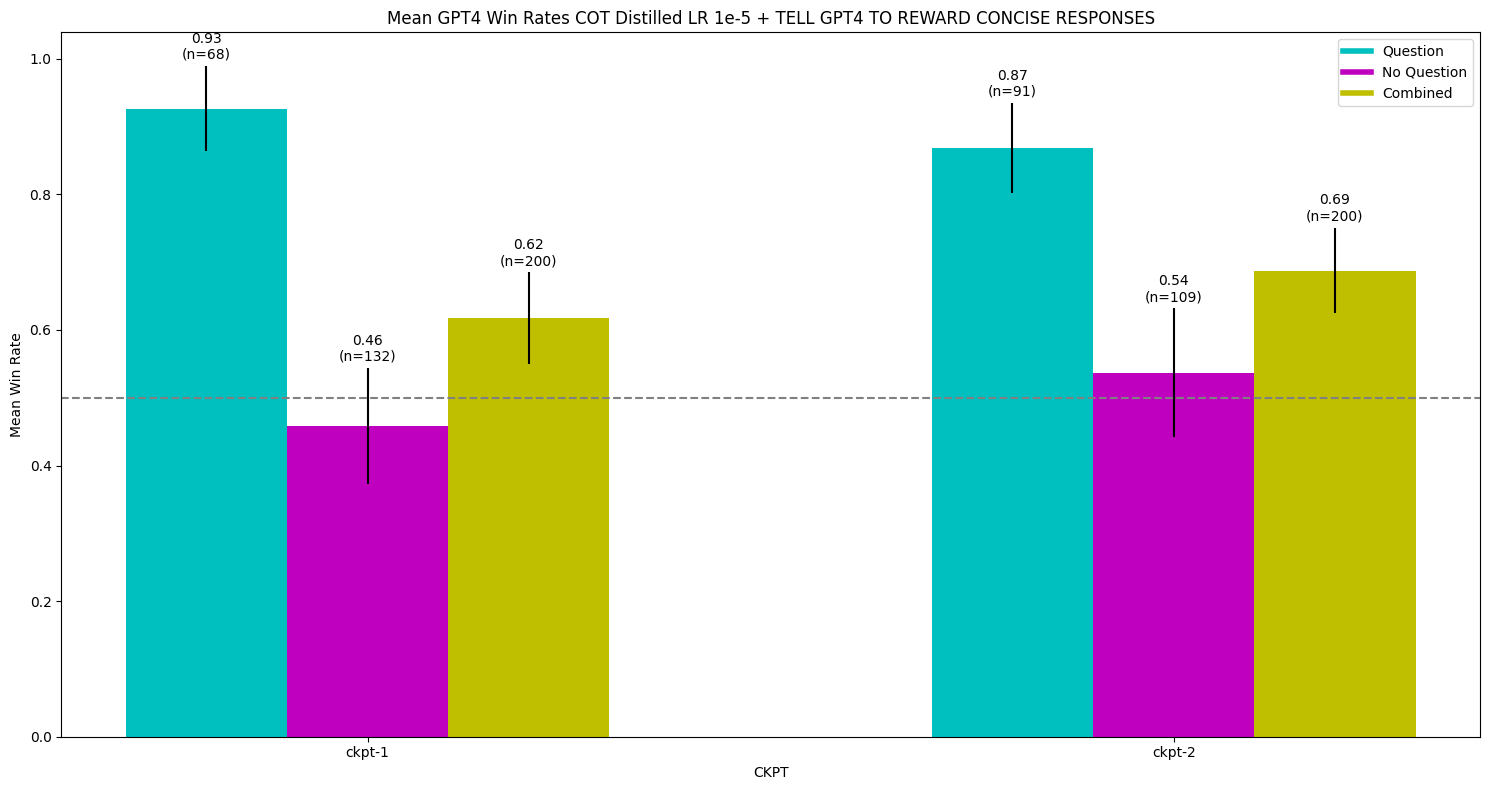

In [58]:
# Load win rates data
stargate_epoch_1_no_cot = json.load(open("results/cot_ckpt_1_questions_user_21_max_words_25_full_sentence_lr_1e-5.json", "r"))
win_rates_no_cot_1 = json.load(open("results/cot_ckpt_1_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_short.json", "r"))
win_rates_no_cot_1_q = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 1]
win_rates_no_cot_1_nq = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 0]


stargate_epoch_1_cot = json.load(open("results/cot_ckpt_2_questions_user_21_max_words_25_full_sentence_lr_1e-5.json", "r"))
win_rates_cot_1 = json.load(open("results/cot_ckpt_2_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_short.json", "r"))
win_rates_cot_1_q = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 1]
win_rates_cot_1_nq = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 0]

# Calculate means and CIs
epochs = ['ckpt-1', 'ckpt-2']
win_rates_no_cot_q = [win_rates_no_cot_1_q, win_rates_no_cot_1_nq, win_rates_no_cot_1]
win_rates_cot_q = [win_rates_cot_1_q, win_rates_cot_1_nq, win_rates_cot_1]

mean_no_cot = [np.mean(win_rate) for win_rate in win_rates_no_cot_q]
mean_cot = [np.mean(win_rate) for win_rate in win_rates_cot_q]
print(mean_no_cot, mean_cot)

ci_no_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_no_cot_q]
ci_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_cot_q]

lens_no_cot = [len(win_rates_no_cot_1_q), len(win_rates_no_cot_1_nq), len(win_rates_no_cot_1)]
lens_cot = [len(win_rates_cot_1_q), len(win_rates_cot_1_nq), len(win_rates_cot_1)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(epochs))

# Define colors for the bars
colors = ['c', 'm', 'y']
labels = ['Question', 'No Question', 'Combined']

# Plot bars for mean_no_cot
for i, (mean, ci, length) in enumerate(zip(mean_no_cot, ci_no_cot, lens_no_cot)):
    bar = ax.bar(index[0] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Plot bars for mean_cot
for i, (mean, ci, length) in enumerate(zip(mean_cot, ci_cot, lens_cot)):
    bar = ax.bar(index[1] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Add labels and title
ax.set_xlabel('CKPT')
ax.set_ylabel('Mean Win Rate')
ax.set_title('Mean GPT4 Win Rates COT Distilled LR 1e-5 + TELL GPT4 TO REWARD CONCISE RESPONSES')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(epochs)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(custom_legend, labels)

# Add vertical line at 0.5 to represent chance
ax.axhline(y=0.5, color='grey', linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

[0.4485294117647059, 0.49242424242424243, 0.4775] [0.5, 0.5, 0.5]


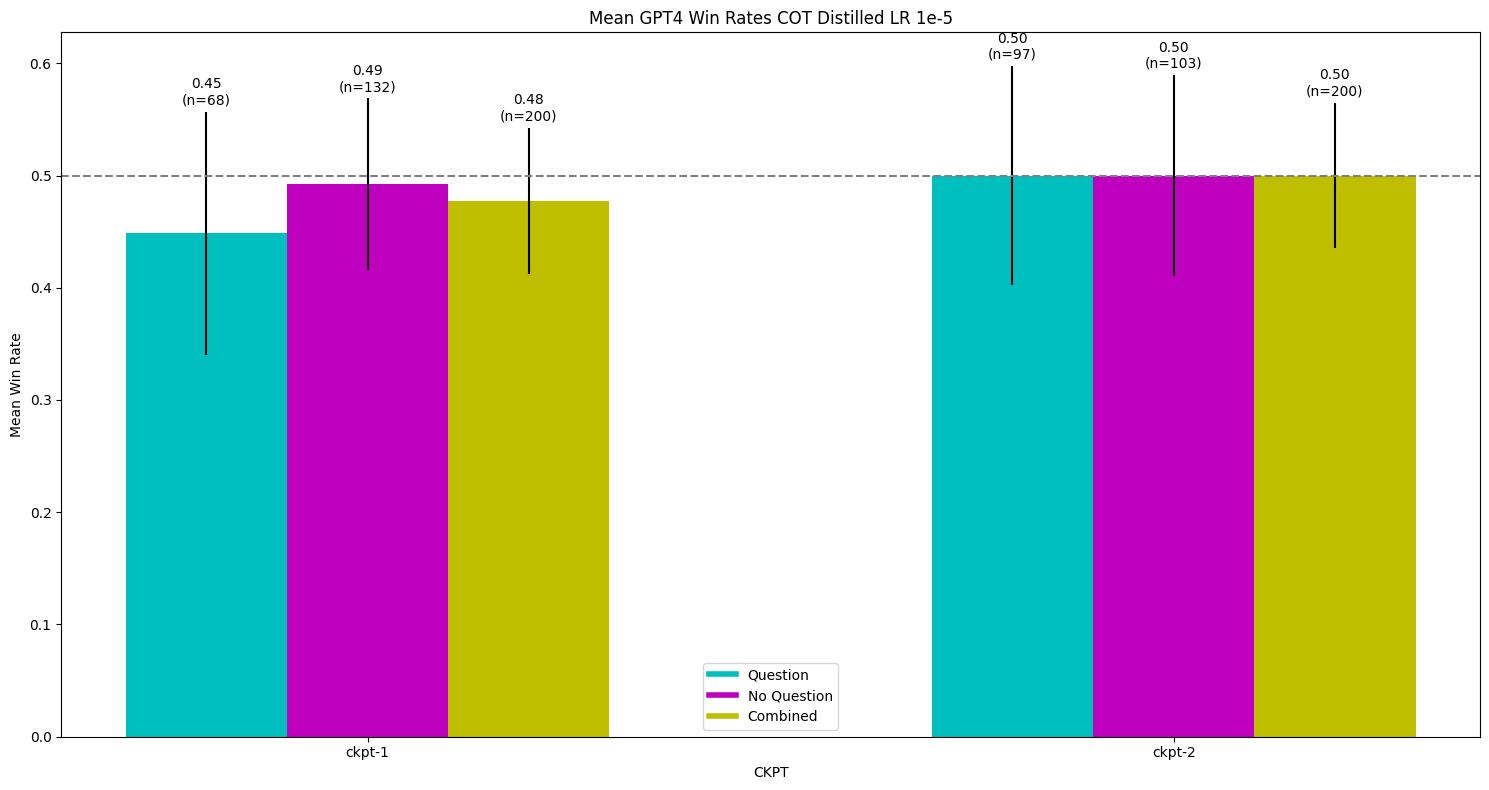

In [59]:
# ONE USER 
# Load win rates data
stargate_epoch_1_no_cot = json.load(open("results/cot_ckpt_1_questions_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_no_cot_1 = json.load(open("results/cot_ckpt_1_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_no_cot_1_q = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 1]
win_rates_no_cot_1_nq = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 0]


stargate_epoch_1_cot = json.load(open("results/cot_ckpt_2_questions_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_cot_1 = json.load(open("results/cot_ckpt_2_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_cot_1_q = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 1]
win_rates_cot_1_nq = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 0]

# Calculate means and CIs
epochs = ['ckpt-1', 'ckpt-2']
win_rates_no_cot_q = [win_rates_no_cot_1_q, win_rates_no_cot_1_nq, win_rates_no_cot_1]
win_rates_cot_q = [win_rates_cot_1_q, win_rates_cot_1_nq, win_rates_cot_1]

mean_no_cot = [np.mean(win_rate) for win_rate in win_rates_no_cot_q]
mean_cot = [np.mean(win_rate) for win_rate in win_rates_cot_q]
print(mean_no_cot, mean_cot)

ci_no_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_no_cot_q]
ci_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_cot_q]

lens_no_cot = [len(win_rates_no_cot_1_q), len(win_rates_no_cot_1_nq), len(win_rates_no_cot_1)]
lens_cot = [len(win_rates_cot_1_q), len(win_rates_cot_1_nq), len(win_rates_cot_1)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(epochs))

# Define colors for the bars
colors = ['c', 'm', 'y']
labels = ['Question', 'No Question', 'Combined']

# Plot bars for mean_no_cot
for i, (mean, ci, length) in enumerate(zip(mean_no_cot, ci_no_cot, lens_no_cot)):
    bar = ax.bar(index[0] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Plot bars for mean_cot
for i, (mean, ci, length) in enumerate(zip(mean_cot, ci_cot, lens_cot)):
    bar = ax.bar(index[1] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Add labels and title
ax.set_xlabel('CKPT')
ax.set_ylabel('Mean Win Rate')
ax.set_title('Mean GPT4 Win Rates COT Distilled LR 1e-5')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(epochs)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(custom_legend, labels)

# Add vertical line at 0.5 to represent chance
ax.axhline(y=0.5, color='grey', linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

[0.8676470588235294, 0.4696969696969697, 0.605] [0.8556701030927835, 0.5048543689320388, 0.675]


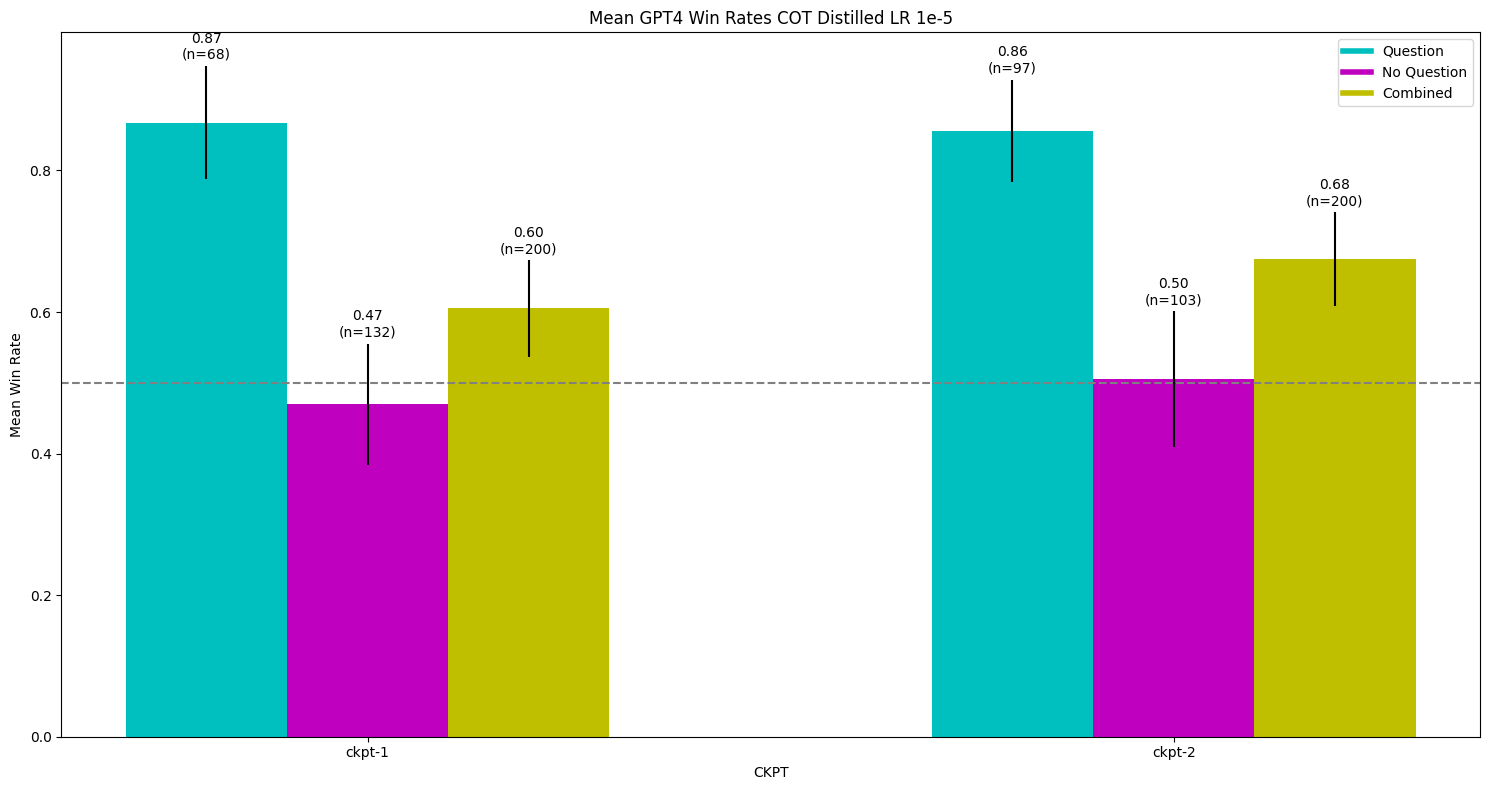

In [129]:
# ONE USER 
# Load win rates data
stargate_epoch_1_no_cot = json.load(open("results/cot_ckpt_1_questions_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_no_cot_1 = json.load(open("results/cot_ckpt_1_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_one_user_short.json", "r"))
win_rates_no_cot_1_q = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 1]
win_rates_no_cot_1_nq = [w for w, q in zip(win_rates_no_cot_1, stargate_epoch_1_no_cot) if q == 0]


stargate_epoch_1_cot = json.load(open("results/cot_ckpt_2_questions_user_21_max_words_25_full_sentence_lr_1e-5_one_user.json", "r"))
win_rates_cot_1 = json.load(open("results/cot_ckpt_2_win_rates_user_21_max_words_25_full_sentence_lr_1e-5_one_user_short.json", "r"))
win_rates_cot_1_q = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 1]
win_rates_cot_1_nq = [w for w, q in zip(win_rates_cot_1, stargate_epoch_1_cot) if q == 0]

# Calculate means and CIs
epochs = ['ckpt-1', 'ckpt-2']
win_rates_no_cot_q = [win_rates_no_cot_1_q, win_rates_no_cot_1_nq, win_rates_no_cot_1]
win_rates_cot_q = [win_rates_cot_1_q, win_rates_cot_1_nq, win_rates_cot_1]

mean_no_cot = [np.mean(win_rate) for win_rate in win_rates_no_cot_q]
mean_cot = [np.mean(win_rate) for win_rate in win_rates_cot_q]
print(mean_no_cot, mean_cot)

ci_no_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_no_cot_q]
ci_cot = [1.96 * bootstrap_se(win_rate) for win_rate in win_rates_cot_q]

lens_no_cot = [len(win_rates_no_cot_1_q), len(win_rates_no_cot_1_nq), len(win_rates_no_cot_1)]
lens_cot = [len(win_rates_cot_1_q), len(win_rates_cot_1_nq), len(win_rates_cot_1)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(epochs))

# Define colors for the bars
colors = ['c', 'm', 'y']
labels = ['Question', 'No Question', 'Combined']

# Plot bars for mean_no_cot
for i, (mean, ci, length) in enumerate(zip(mean_no_cot, ci_no_cot, lens_no_cot)):
    bar = ax.bar(index[0] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Plot bars for mean_cot
for i, (mean, ci, length) in enumerate(zip(mean_cot, ci_cot, lens_cot)):
    bar = ax.bar(index[1] + i * bar_width, mean, bar_width, yerr=ci, color=colors[i])
    ax.bar_label(bar, labels=[f'{mean:.2f}\n(n={length})'], padding=3)

# Add labels and title
ax.set_xlabel('CKPT')
ax.set_ylabel('Mean Win Rate')
ax.set_title('Mean GPT4 Win Rates COT Distilled LR 1e-5')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(epochs)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(custom_legend, labels)

# Add vertical line at 0.5 to represent chance
ax.axhline(y=0.5, color='grey', linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

In [17]:
import os
gains = sorted(os.listdir("data/expected_info_gain/5k_v2/"), key=lambda item: int(item.split("_")[2]))
eigs = []
for g in gains:
    data = json.load(open(f"data/expected_info_gain/5k_v2/{g}", "r"))
    eigs.extend


{'best_question_for_prompt_4096': {'question_performances': [0.010706195082394033,
   0.004436334496650485,
   0.007528974653908937,
   0.002494306627039489,
   0.006392715394462112,
   0.0040796631716517595,
   0.00790308197409848,
   0.0010311444855322983,
   0.009955936610545547],
  'questions': ['Please share your profile with me so I can provide a personalized response.',
   'What is the name of your dog?',
   "Can you tell me a little bit about your current smoking habits, such as how many cigarettes you smoke per day, how long you've been smoking, and what motivates you to want to quit? Additionally, are there any specific challenges or obstacles you're worried about when it comes to quitting, and are there any particular methods or strategies you're considering trying?",
   "Can you tell me what motivated you to quit smoking now, and what obstacles or challenges you're currently facing that are making it difficult for you to quit?",
   'Can you please tell me what motivated you